In [32]:
library(INLA)
library(invgamma)
library("MASS")
library("fdrtool") # for rhalfnorm


n = 100
x= (1:n) / n


[1] 1.24

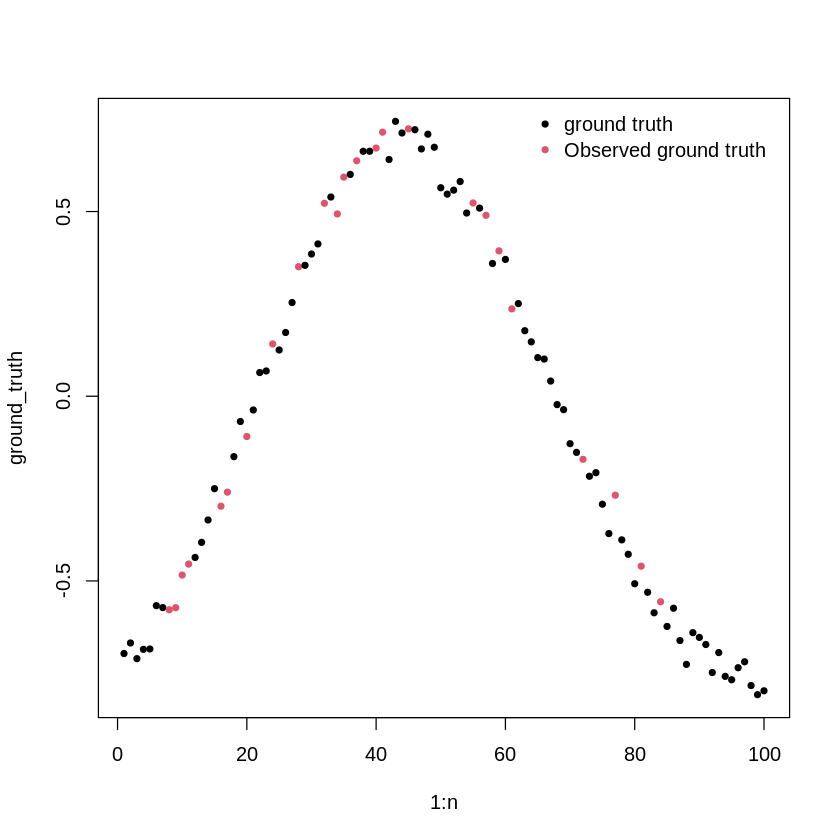

In [33]:
ground_truth = c(-0.6965187788009644, -0.6679209470748901, -0.7103891372680664, -0.6851717829704285, -0.6841915249824524, -0.5668666362762451, -0.5722213387489319, -0.5780259966850281, -0.5724526047706604, -0.48403918743133545, -0.4543328881263733, -0.436381459236145, -0.3955748379230499, -0.3349480628967285, -0.2502446174621582, -0.29764896631240845, -0.2595856785774231, -0.16356737911701202, -0.06836479902267456, -0.10906502604484558, -0.03724215179681778, 0.06418919563293457, 0.06843328475952148, 0.14150741696357727, 0.12523609399795532, 0.17257541418075562, 0.2536618709564209, 0.3506408929824829, 0.3543667197227478, 0.3849707543849945, 0.4122837483882904, 0.5222899913787842, 0.5392687320709229, 0.4935515820980072, 0.5931767821311951, 0.6004530191421509, 0.6374411582946777, 0.6630330085754395, 0.6631835103034973, 0.6718357801437378, 0.71482914686203, 0.6407859921455383, 0.7441797852516174, 0.7126187682151794, 0.7239460349082947, 0.7214811444282532, 0.6694684028625488, 0.7093082070350647, 0.6740366816520691, 0.5644036531448364, 0.547078549861908, 0.5578815340995789, 0.5812382698059082, 0.4959672689437866, 0.5231911540031433, 0.5092390775680542, 0.4897089898586273, 0.35933029651641846, 0.3935067057609558, 0.3704443573951721, 0.23652081191539764, 0.2508527636528015, 0.1774042695760727, 0.14722715318202972, 0.10458831489086151, 0.10060330480337143, 0.04113604873418808, -0.022685861214995384, -0.036370061337947845, -0.12842771410942078, -0.15198564529418945, -0.17068874835968018, -0.21663402020931244, -0.2069537341594696, -0.2923087179660797, -0.37178802490234375, -0.2678752839565277, -0.38881829380989075, -0.4278460741043091, -0.5075673460960388, -0.45998191833496094, -0.5307313799858093, -0.5861528515815735, -0.5564097166061401, -0.6231715679168701, -0.5739148855209351, -0.6613097786903381, -0.7259194254875183, -0.6399742364883423, -0.6528728604316711, -0.6721140146255493, -0.7479739785194397, -0.6939185857772827, -0.7583205103874207, -0.767551839351654, -0.7348857522010803, -0.7188783884048462, -0.7831867933273315, -0.8078792691230774, -0.7973722815513611)

obs_idx = c(8, 9, 10, 11, 16, 17, 20, 24, 28, 32, 34, 35,37,40, 41, 45,55, 57,59, 61, 72, 77, 81, 84)
observations = rep(NA, n)

gt_plot_colours = rep(1, n)

for (i in 1:length(obs_idx)){
    observations[obs_idx[i]] = ground_truth[obs_idx[i]]
    gt_plot_colours[obs_idx[i]] = 2
}
na_points = which(is.na(observations))

plot(1:n, ground_truth, col=gt_plot_colours, pch=20)
legend("topright", legend = c("ground truth", "Observed ground truth"), col = 1:2, pch = 20, bty = "n")

mean(gt_plot_colours)

In [34]:
# covariance matrix using exp-squared kernel, without lengthscale or variance
K = exp(-0.5 * dist(as.matrix(x), upper=TRUE, diag=TRUE, method="euclidean", p=2) ^2 / 0.33041656 ^ 2)

precision = Matrix::solve((K))

In [35]:

# does not have lengthscale yet!
kernel_prior <- list(prec = list(prior = "logtnormal", param = c(0, 10),
                                initial = 0, fixed = FALSE))


formula <- y ~ 0 + f(x1, Z=diag(1, n, n), Cmatrix = precision, hyper = kernel_prior,  model="z") + f(x2, model="iid", hyper=list(prec=list(prior= "expression:
  tau0 = 0.001;
  sigma = exp(-theta/2);
  log_dens = log(2) - 0.5 * log(2 * pi) + 0.5 * log(tau0);
  log_dens = log_dens - 0.5 * tau0 * sigma^2;
  log_dens = log_dens - log(2) - theta / 2;
  return(log_dens);  
"))) 

results = inla(formula, data=list(y=observations, x1=1:n, x2=1:n), family = "gaussian", control.predictor = list(compute = TRUE), verbose = TRUE,)
                    # safe=FALSE,
                    # inla.mode = "experimental")

#summary(results)
#results$summary.fitted.values[na_points, c("mean")]



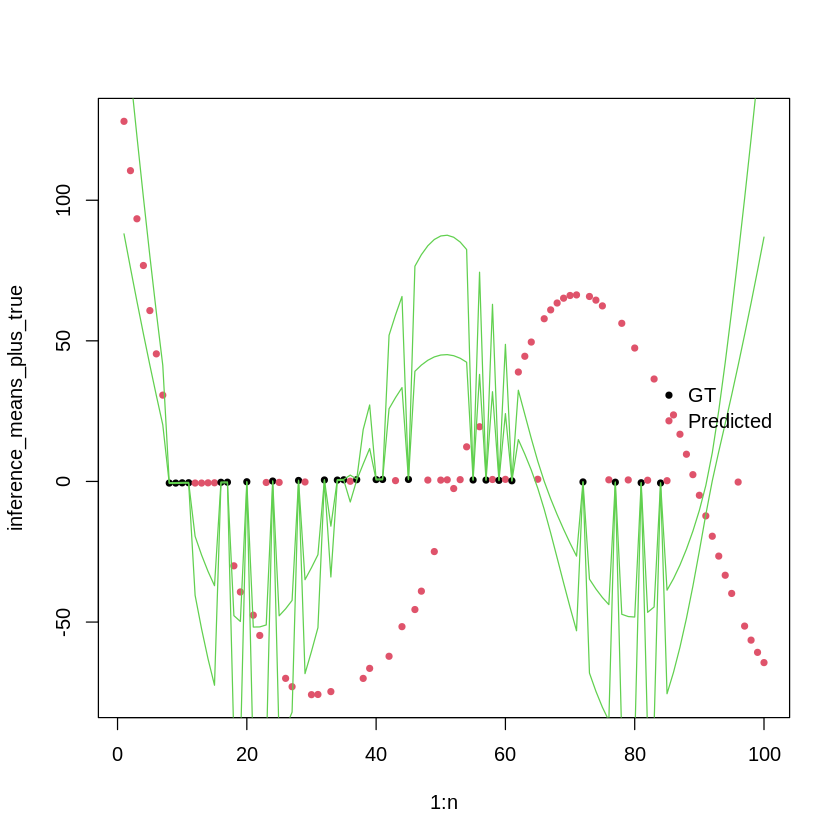

In [37]:

inference_means_plus_true = rep(NA, n)
colours = rep(NA, n)
for (i in 1:length(obs_idx)){
  inference_means_plus_true[obs_idx[i]] = ground_truth[obs_idx[i]] 
  colours[obs_idx[i]] = 1
}
for (i in 1:length(na_points)){
  inference_means_plus_true[na_points[i]] = results$summary.fitted.values[i, c("mode")]
  colours[na_points[i]] = 2
}


plot(1:n, inference_means_plus_true, col=colours, pch=20)
lines(results$summary.fitted.values[c("0.025quant")], col=3)

lines(results$summary.fitted.values[c("0.975quant")], col=3)
legend("right", legend = c("GT", "Predicted"), col = 1:2, pch = 20, bty = "n")



In [31]:
results$summary.fitted.values

,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fitted.Predictor.001,2.2529678,3.41905853,-4.3827174,2.2230095,9.0460138,2.1545739
fitted.Predictor.002,1.9740781,3.17311579,-4.1952378,1.9513866,8.2638888,1.9003928
fitted.Predictor.003,1.7015930,2.95242569,-4.0494138,1.6853369,7.5398525,1.6494085
fitted.Predictor.004,1.4367112,2.76059367,-3.9506010,1.4258605,6.8828490,1.4022515
fitted.Predictor.005,1.1805874,2.60076665,-3.9033575,1.1739663,6.3007434,1.1597390
fitted.Predictor.006,0.9343231,2.47516713,-3.9106852,0.9307148,5.7992052,0.9230016
fitted.Predictor.007,0.6989567,2.38458986,-3.9731905,0.6972471,5.3805696,0.6935490
fitted.Predictor.008,-0.5779700,0.01376035,-0.6075352,-0.5780065,-0.5482489,-0.5780163
fitted.Predictor.009,-0.5724041,0.01376019,-0.6019892,-0.5724370,-0.5427031,-0.5724447
